In [2]:
import pandas as pd 
df = pd.read_csv("C:/Users/herbert.zaczyk/OneDrive - Avanade/--Git folder/approaching_almost_every_ml_problem/data/winequality-red.csv",sep=";")

In [3]:
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [5]:
df = df.sample(frac=1).reset_index(drop=True)  ##shuffles the data
df_train= df.head(1000) #creates training data out of first 1000 rows
df_test = df.tail(599)

In [6]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=7) #initialize decision tree with depth of 3
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)


In [8]:
print('train accuracy is: '+ str(round(train_accuracy,ndigits=2)*100) +'%')
print('test accuracy is: '+ str(round(test_accuracy,ndigits=3)*100) +'%')


train accuracy is: 75.0%
test accuracy is: 58.9%


In [9]:
from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 


In [10]:
matplotlib.pyplot.rc('xtick', labelsize = 20)
matplotlib.pyplot.rc('ytick', labelsize = 20)
%matplotlib inline

In [11]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [12]:
#iteration over depth values
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth= depth)

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [13]:
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=24,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

In [15]:
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [16]:
train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

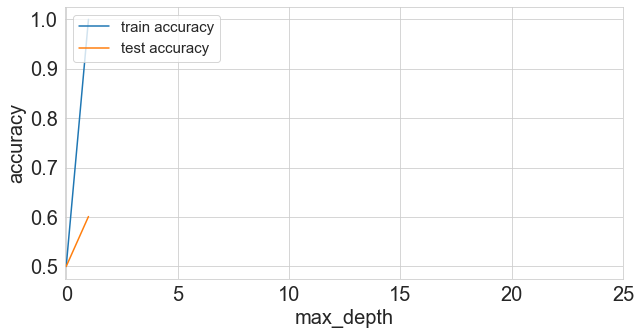

In [17]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label = "test accuracy")
plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth", size = 20)
plt.ylabel("accuracy", size = 20)
plt.show()

### Wenn die Test Accuracy gleich bleibt oder geringer wird => Overfitting startet 

In [19]:
display(df_train)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,12.0,0.630,0.50,1.4,0.071,6.0,26.0,0.99791,3.07,0.60,10.4,1
1,8.0,0.300,0.63,1.6,0.081,16.0,29.0,0.99588,3.30,0.78,10.8,3
2,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,9.6,2
3,7.1,0.590,0.02,2.3,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,3
4,5.7,0.600,0.00,1.4,0.063,11.0,18.0,0.99191,3.45,0.56,12.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,3
996,7.6,0.540,0.13,2.5,0.097,24.0,66.0,0.99785,3.39,0.61,9.4,2
997,7.0,0.620,0.10,1.4,0.071,27.0,63.0,0.99600,3.28,0.61,9.2,2
998,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,4


## kfold validation

In [24]:
import pandas as pd
from sklearn import model_selection

In [25]:
if __name__ == 'main':
    df = pd.read_csv("train.csv")
    df["kfold"] = -1
    df= df.sample(frac=1).reset_index(drop=True)
    kf = model_selection.KFold(n_splits=5)
    for fold, (trn_,val_) in enumerate(kf.split(X=df)):
        df.loc[cal_, 'kfold']= fold
        df.to_csv("train_folds.csv", index= False)